# Convolutional Neural Network

## Getting the data

In [6]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords": "attack on titan season 2 anime,attack on titan season 1 anime,attack on titan season 3 anime,attack on titan levi anime","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = attack on titan season 2 anime
Evaluating...
Starting Download...
Image URL: https://images-na.ssl-images-amazon.com/images/I/91aSWggiMhL._RI_.jpg
Completed Image ====> 1.91aSWggiMhL._RI_.jpg
Image URL: https://cdn.vox-cdn.com/thumbor/gVkx8kUxmzxLWzvdDVSvJSWzNqI=/0x0:1442x2048/1200x800/filters:focal(606x909:836x1139)/cdn.vox-cdn.com/uploads/chorus_image/image/53117053/C3_r5o2VMAAzU4e.0.jpg
Completed Image ====> 2.C3_r5o2VMAAzU4e.0.jpg
Image URL: http://image.en.yibada.com/data/thumbs/full/92495/685/0/0/0/attack-on-titan-is-a-japanese-manga-series-written-and-illustrated-by-hajime-isayama.png
Completed Image ====> 3.attack-on-titan-is-a-japanese-manga-series-written-and-illustrated-by-hajime-isayama.png
Image URL: https://ksassets.timeincuk.net/wp/uploads/sites/54/2017/05/attack-on-titan-2.jpg
Completed Image ====> 4.attack-on-titan-2.jpg
Image URL: https://img1.ak.crunchyroll.com/i/spire1/13b484b48acc14537703fbc505b087121558560482_full.jpg
Completed Image =

Completed Image ====> 52.maxresdefault.jpg
Image URL: https://i.scdn.co/image/e4a4cf38f9c3aeda3c2fa65cde0a81222e492c41
Invalid or missing image format. Skipping...
Image URL: https://gamingcentral.in/wp-content/uploads/2016/12/maxresdefault-34-1050x600.jpg
Completed Image ====> 53.maxresdefault-34-1050x600.jpg
Image URL: https://media.comicbook.com/2018/03/attack-on-titan-season-2-episode-9-opening-0-1089254-1280x0.jpeg
Completed Image ====> 54.attack-on-titan-season-2-episode-9-opening-0-1089254-1280x0.jpeg
Image URL: https://nefariousreviews.files.wordpress.com/2017/06/attack-on-titan-s2-featured.jpg?w=672&h=372&crop=1
Completed Image ====> 55.attack-on-titan-s2-featured.jpg
Image URL: https://i.ytimg.com/vi/-w_AmR_hNLc/maxresdefault.jpg
Completed Image ====> 56.maxresdefault.jpg
Image URL: http://images.en.koreaportal.com/data/images/full/31466/attack-on-titan-season-2-episode-8-episode-33-live-stream-watch-online-with-english-subtitles-the-hunters.png?w=750
Completed Image ====> 57

Completed Image ====> 93.ee24d33e49bc4ae1949722d63bc3d88a.jpg
Image URL: https://dc.newsweek.com/en/full/2014208/attack-titan-season-3-official-subtitled-trailer.jpg?w=480&h=270&l=50&t=40&q=55&f=79f0ab32d730660bf2c47a78e6624f1b
Completed Image ====> 94.attack-titan-season-3-official-subtitled-trailer.jpg
Image URL: https://www.funimationfilms.com/wp-content/uploads/2017/03/AToT-HERO2.jpg
Completed Image ====> 95.AToT-HERO2.jpg


Unfortunately all 100 could not be downloaded because some images were not downloadable. 95 is all we got for this search filter!

Errors: 5


Item no.: 2 --> Item name = attack on titan season 1 anime
Evaluating...
Starting Download...
Image URL: https://img1.ak.crunchyroll.com/i/spire1-tmb/745d6f6f240ffc99cc08f4f4d52f6e0b1374356790_full.jpg
Completed Image ====> 1.745d6f6f240ffc99cc08f4f4d52f6e0b1374356790_full.jpg
Image URL: https://cdn.shoplightspeed.com/shops/608693/files/3478684/funimation-entertainment-attack-on-titan-season-1.jpg
Completed Image ====> 2

Completed Image ====> 44.704400072956_anime-attack-on-titan-season-two-bd-dvd-combo-le-primary.jpg
Image URL: https://secureservercdn.net/160.153.137.18/c7f.ccf.myftpupload.com/wp-content/uploads/2019/02/Eren-Jaeger-Attack-On-Titan-Season-3-696x400.jpg
Completed Image ====> 45.Eren-Jaeger-Attack-On-Titan-Season-3-696x400.jpg
Image URL: https://cdn2us.denofgeek.com/sites/denofgeekus/files/styles/main_wide/public/2018/07/attack-on-titan-season-3-premiere-review-smoke-signal.png?itok=dwrvLla4
Completed Image ====> 46.attack-on-titan-season-3-premiere-review-smoke-signal.png
Image URL: https://nefariousreviews.files.wordpress.com/2017/06/attack-on-titan-s2-featured.jpg?w=672&h=372&crop=1
Completed Image ====> 47.attack-on-titan-s2-featured.jpg
Image URL: https://cdn.inquisitr.com/wp-content/uploads/2019/04/Attack-on-Titan.jpg
Completed Image ====> 48.Attack-on-Titan.jpg
Image URL: https://images.latintimes.com/sites/latintimes.com/files/2014/08/01/attack-titan-season-2-release-date.jpg
Com

Completed Image ====> 91.anime_20180918_shingeki3t.jpg
Image URL: https://cdn2-www.gamerevolution.com/assets/uploads/2019/01/attack-on-titan-season-3-e1546884739177.jpg
Completed Image ====> 92.attack-on-titan-season-3-e1546884739177.jpg
Image URL: https://i.ytimg.com/vi/DpEfsDmMyF4/maxresdefault.jpg
Completed Image ====> 93.maxresdefault.jpg
Image URL: https://i2.wp.com/metro.co.uk/wp-content/uploads/2018/02/sec_289043.jpg?quality=90&strip=all&zoom=1&resize=644%2C362&ssl=1
Completed Image ====> 94.sec_289043.jpg
Image URL: https://prodimage.images-bn.com/pimages/9781632367006_p0_v1_s550x406.jpg
Completed Image ====> 95.9781632367006_p0_v1_s550x406.jpg
Image URL: http://2.bp.blogspot.com/-K278U5L-k1w/U5D2xf3ez8I/AAAAAAAAQ1I/75Wc4doArUk/s1600/Ep+5+2.png
Completed Image ====> 96.Ep+5+2.png
Image URL: https://cdn.myanimelist.net/r/360x360/images/anime/4/84177.jpg?s=1fb4420ae71182087e7bc7c1f3528270
Completed Image ====> 97.84177.jpg
Image URL: https://www.thecinemaholic.com/wp-content/uplo

Completed Image ====> 39.Attack-On-Titan-Season-3-Release-Date-Confirmed-For-2018-Shingeki-no-Kyojin-Anime-Shows-Kenny-Levi-Ackerman.jpg
Image URL: https://videos.metro.co.uk/pix/met/2018/04/28/11/4BA3E47E00000578-0-image-a-26_1524912139933.jpg
Completed Image ====> 40.4BA3E47E00000578-0-image-a-26_1524912139933.jpg
Image URL: https://twinfinite.net/wp-content/uploads/2018/05/Attack-on-Titan-Season-3-Banner.jpg
Completed Image ====> 41.Attack-on-Titan-Season-3-Banner.jpg
Image URL: http://images.en.koreaportal.com/data/images/full/32796/attack-on-titan-season-3-episode-1-episode-38-expected-airdate-spoilers-when-will-shingeki-no-kyojin-returns.jpg?w=750
Completed Image ====> 42.attack-on-titan-season-3-episode-1-episode-38-expected-airdate-spoilers-when-will-shingeki-no-kyojin-returns.jpg
Image URL: https://i.ytimg.com/vi/MLJoTJkv6Q4/maxresdefault.jpg
Completed Image ====> 43.maxresdefault.jpg
Image URL: https://cdn.myanimelist.net/r/360x360/images/anime/1173/92110.jpg?s=3aeb8b50ebdaff

Completed Image ====> 86.attack_on_titan_s3.jpg
Image URL: https://fsmedia.imgix.net/a1/23/1d/ff/249f/4871/b6f3/e3af4997bbfe/attack-on-titan-season-2jpg.jpeg?auto=format%2Ccompress&h=1200&w=1200&crop=edges&fit=crop
Completed Image ====> 87.attack-on-titan-season-2jpg.jpeg
Image URL: https://cdn2us.denofgeek.com/sites/denofgeekus/files/styles/article_width/public/2018/05/attack-on-titan-season-3-levi-poster.jpeg?itok=FMDWExPU
Completed Image ====> 88.attack-on-titan-season-3-levi-poster.jpeg
Image URL: https://secureservercdn.net/160.153.137.18/c7f.ccf.myftpupload.com/wp-content/uploads/2018/07/Captain-Levi-Attack-On-Titan-Season-3-anime-696x383.jpg
Completed Image ====> 89.Captain-Levi-Attack-On-Titan-Season-3-anime-696x383.jpg
Image URL: https://www.otakuusamagazine.com/wp-content/uploads/2018/04/AttackonTitans3promoheader-1024x639.jpg
Completed Image ====> 90.AttackonTitans3promoheader-1024x639.jpg
Image URL: http://cdn1.wakanim.tv/movies-pictures/ddbfb116-8755-4fb7-a524-06a8ecdc6406

Completed Image ====> 30.MmFD.gif
Image URL: https://static.zerochan.net/Levi.Ackerman.full.1595642.jpg
Completed Image ====> 31.Levi.Ackerman.full.1595642.jpg
Image URL: https://cdn.shopify.com/s/files/1/1222/3190/products/levi_from_attack_on_titan_poster_in_India_by_Silly_punter_95f31fdb-a8b2-440a-8753-43068f76f4a8.jpg?v=1473234831
Completed Image ====> 32.levi_from_attack_on_titan_poster_in_India_by_Silly_punter_95f31fdb-a8b2-440a-8753-43068f76f4a8.jpg
Image URL: https://vignette.wikia.nocookie.net/shingekinokyojin/images/6/6f/Levi_Ackermann_%28Anime%29_character_image_%28Child%29.png/revision/latest/scale-to-width-down/350?cb=20190311013043
Invalid or missing image format. Skipping...
Image URL: https://www.1999.co.jp/itbig43/10438250.jpg
Completed Image ====> 33.10438250.jpg
Image URL: https://www.1999.co.jp/itbig51/10515743.jpg
Completed Image ====> 34.10515743.jpg
Image URL: https://pbs.twimg.com/media/DXwQj6TU0AAKxp_.jpg
Completed Image ====> 35.DXwQj6TU0AAKxp_.jpg
Image URL: h

Completed Image ====> 77.DYUDeY_WAAAHW80.jpg
Image URL: https://videos.metro.co.uk/pix/met/2018/04/28/11/4BA3E47E00000578-0-image-a-26_1524912139933.jpg
Completed Image ====> 78.4BA3E47E00000578-0-image-a-26_1524912139933.jpg
Image URL: https://img3.akspic.com/image/119487-mikasa_ackerman-levi-attack_on_titan-sky-anime-1080x1920.jpg
Completed Image ====> 79.119487-mikasa_ackerman-levi-attack_on_titan-sky-anime-1080x1920.jpg
Image URL: https://cdn.imgbin.com/19/16/9/imgbin-levi-anime-eren-yeager-attack-on-titan-manga-anime-0bJShCT6pvn9vMwwewL7kV6Rf.jpg
Completed Image ====> 80.imgbin-levi-anime-eren-yeager-attack-on-titan-manga-anime-0bJShCT6pvn9vMwwewL7kV6Rf.jpg
Image URL: https://www.wig-supplier.com/media/catalog/product/cache/1/thumbnail/1000x1000/040ec09b1e35df139433887a97daa66f/c/c/cc1096a_1attack_on_titan_levi_black_cosplay_costumes.jpg
Completed Image ====> 81.cc1096a_1attack_on_titan_levi_black_cosplay_costumes.jpg
Image URL: https://i.pinimg.com/736x/6e/d9/1e/6ed91ec9d62be79ce

In [8]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('downloads', output="dataset3", seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# split_folders.fixed('downloads', output="dataset", seed=1337, fixed=(100, 100), oversample=False) # default values

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-c34bc932c147>", line 5, in <module>
    split_folders.ratio('downloads', output="dataset3", seed=1337, ratio=(.8, .2)) # default values
  File "/anaconda3/anaconda3/lib/python3.7/site-packages/split_folders/split.py", line 57, in ratio
    for class_dir in list_dirs(input):
  File "/anaconda3/anaconda3/lib/python3.7/site-packages/split_folders/split.py", line 44, in list_dirs
    return [f for f in pathlib.Path(directory).iterdir() if f.is_dir()]
  File "/anaconda3/anaconda3/lib/python3.7/site-packages/split_folders/split.py", line 44, in <listcomp>
    return [f for f in pathlib.Path(directory).iterdir() if f.is_dir()]
  File "/anaconda3/anaconda3/lib/python3.7/pathlib.py", line 1074, in iterdir
    for name in self._accessor.listdir(self):
FileNotFoundError: 

FileNotFoundError: [Errno 2] No such file or directory: 'downloads'

## Building baseline model

### Building the CNN

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

Instructions for updating:
Colocations handled automatically by placer.


"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [4]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

'reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'

In [5]:
# Step 3 - Flattening
classifier.add(Flatten())

In [6]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))

'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=1, activation='sigmoid'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [8]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

####  Image Preprocessing

In [9]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


#### Checkpoint

In [10]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [11]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=647,
                         epochs=5,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=160)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


/usr/local/lib/python3.5/dist-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


647/647 [==============================] - 751s 1s/step - loss: 0.2244 - acc: 0.9115 - val_loss: 0.7170 - val_acc: 0.8063

Epoch 00001: val_acc improved from -inf to 0.80625, saving model to weights.best.hdf5
Epoch 2/5
647/647 [==============================] - 745s 1s/step - loss: 0.0432 - acc: 0.9865 - val_loss: 0.9078 - val_acc: 0.8375

Epoch 00002: val_acc improved from 0.80625 to 0.83750, saving model to weights.best.hdf5
Epoch 3/5
647/647 [==============================] - 735s 1s/step - loss: 0.0170 - acc: 0.9950 - val_loss: 1.2376 - val_acc: 0.7937

Epoch 00003: val_acc did not improve from 0.83750
Epoch 4/5
647/647 [==============================] - 746s 1s/step - loss: 0.0179 - acc: 0.9944 - val_loss: 1.3792 - val_acc: 0.7937

Epoch 00004: val_acc did not improve from 0.83750
Epoch 5/5
647/647 [==============================] - 739s 1s/step - loss: 0.0095 - acc: 0.9971 - val_loss: 1.4143 - val_acc: 0.7937

Epoch 00005: val_acc did not improve from 0.83750


'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

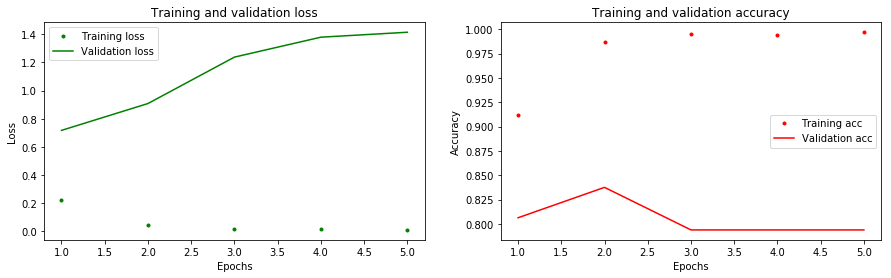

In [12]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
classifier.save('model1.h5')

In [14]:
from keras.models import load_model
model1 = load_model('Models/model1.h5')
model1.load_weights('Models/model1_weights.best.hdf5')

In [15]:
model1.evaluate_generator(generator=test_set,
steps=160)

[0.9080773990601301, 0.8376953125]

## Binary Model with Added Convolution Layers and Dropout

### Building the CNN

In [72]:
# Initialising the CNN
classifier = Sequential()

In [73]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [74]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [75]:
# Step 3 - Flattening
classifier.add(Flatten())

In [76]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=1, activation='sigmoid'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [77]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

####  Image Preprocessing

In [78]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


#### Checkpoint

In [79]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [80]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=647,
                         epochs=5,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=160)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/5
647/647 [==============================] - 731s 1s/step - loss: 0.3237 - acc: 0.8553 - val_loss: 0.3669 - val_acc: 0.8250

Epoch 00001: val_acc improved from -inf to 0.82500, saving model to weights.best.hdf5
Epoch 2/5
647/647 [==============================] - 720s 1s/step - loss: 0.1159 - acc: 0.9558 - val_loss: 0.4287 - val_acc: 0.8500

Epoch 00002: val_acc improved from 0.82500 to 0.85000, saving model to weights.best.hdf5
Epoch 3/5
647/647 [==============================] - 720s 1s/step - loss: 0.0582 - acc: 0.9802 - val_loss: 0.5397 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.85000 to 0.87500, saving model to weights.best.hdf5
Epoch 4/5
647/647 [==============================] - 721s 1s/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.6324 - val_acc: 0.8438

Epoch 00004: val_acc did not improve from 0.87500
Epoch 5/5
647/647 [==============================] - 725s 1s/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.8014 - val_acc: 0.8375

Epoch 00005: val_acc 

'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

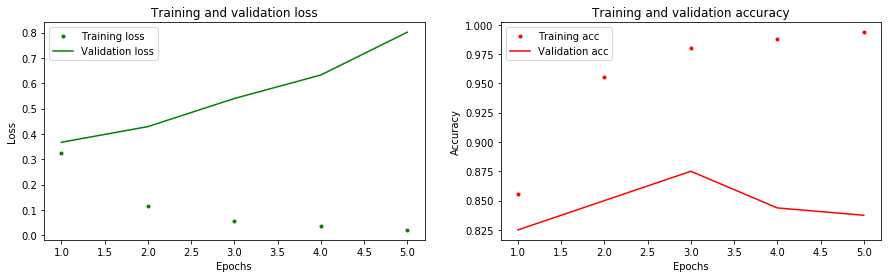

In [81]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
classifier.save('model2.h5')

In [85]:
from keras.models import load_model
model2 = load_model('Models/model2.h5')
model2.load_weights('Models/model2_weights.best.hdf5')

In [86]:
model2.evaluate_generator(generator=test_set,
steps=160)

[0.5368599732406437, 0.875]

## Creating a Multi-Class Model

### Building the CNN

In [22]:
# Initialising the CNN
classifier = Sequential()

In [23]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [24]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [25]:
# Step 3 - Flattening
classifier.add(Flatten())

In [26]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=3, activation='softmax'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [27]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

#### Image Preprocessing

In [163]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset2/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset2/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.


#### Checkpoint

In [29]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [30]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=919,
                         epochs=10,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=231)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/10
919/919 [==============================] - 1108s 1s/step - loss: 0.6146 - acc: 0.7279 - val_loss: 0.6582 - val_acc: 0.7791

Epoch 00001: val_acc improved from -inf to 0.77914, saving model to weights.best.hdf5
Epoch 2/10
919/919 [==============================] - 1099s 1s/step - loss: 0.2294 - acc: 0.9142 - val_loss: 0.7971 - val_acc: 0.8055

Epoch 00002: val_acc improved from 0.77914 to 0.80546, saving model to weights.best.hdf5
Epoch 3/10
919/919 [==============================] - 1098s 1s/step - loss: 0.1204 - acc: 0.9567 - val_loss: 0.9988 - val_acc: 0.7917

Epoch 00003: val_acc did not improve from 0.80546
Epoch 4/10
919/919 [==============================] - 1102s 1s/step - loss: 0.0878 - acc: 0.9688 - val_loss: 1.1607 - val_acc: 0.7831

Epoch 00004: val_acc did not improve from 0.80546
Epoch 5/10
919/919 [==============================] - 1101s 1s/step - loss: 0.0662 - acc: 0.9763 - val_loss: 1.0953 - val_acc: 0.7824

Epoch 00005: val_acc did not improve from 0.80546


'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

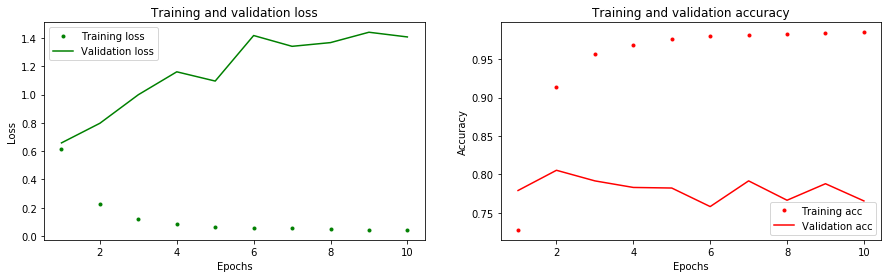

In [31]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
classifier.save('model3.h5')

In [161]:
from keras.models import load_model
model3 = load_model('Models/model3.h5')
model3.load_weights('Models/model3_weights.best.hdf5')

In [164]:
model3.evaluate_generator(generator=test_set,
steps=231)

[0.7975561319317644, 0.8054393308734865]

## Model 4

### Building the CNN

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.

'''

Instructions for updating:
Colocations handled automatically by placer.


"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n\n"

In [4]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a fourth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a fifth convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# Step 3 - Flattening
classifier.add(Flatten())

In [6]:
# Step 4 - Full connection
classifier.add(Dense(units=256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=3, activation='softmax'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [7]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''


" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images


#### Image Preprocessing

In [8]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


batch_size=5

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset2/train',
                                                 target_size=(128, 128),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset2/val',
                                            target_size=(128, 128),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.


#### Checkpoint

In [10]:
# checkpoint
filepath="model4_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#### Fit Generator

In [11]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=919 // batch_size,
                         epochs=50,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=231 // batch_size)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Instructions for updating:
Use tf.cast instead.
Epoch 1/50


/usr/local/lib/python3.5/dist-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


183/183 [==============================] - 45s 248ms/step - loss: 1.8139 - acc: 0.3530 - val_loss: 1.3402 - val_acc: 0.4391

Epoch 00001: val_acc improved from -inf to 0.43913, saving model to model4_weights.best.hdf5
Epoch 2/50
183/183 [==============================] - 35s 191ms/step - loss: 1.2197 - acc: 0.4044 - val_loss: 1.1913 - val_acc: 0.3540

Epoch 00002: val_acc did not improve from 0.43913
Epoch 3/50
183/183 [==============================] - 35s 191ms/step - loss: 1.1505 - acc: 0.3678 - val_loss: 1.1247 - val_acc: 0.3673

Epoch 00003: val_acc did not improve from 0.43913
Epoch 4/50
183/183 [==============================] - 36s 199ms/step - loss: 1.0718 - acc: 0.4634 - val_loss: 1.0327 - val_acc: 0.5265

Epoch 00004: val_acc improved from 0.43913 to 0.52655, saving model to model4_weights.best.hdf5
Epoch 5/50
183/183 [==============================] - 36s 197ms/step - loss: 1.0767 - acc: 0.4298 - val_loss: 1.0276 - val_acc: 0.4956

Epoch 00005: val_acc did not improve from 

183/183 [==============================] - 35s 192ms/step - loss: 0.4886 - acc: 0.8292 - val_loss: 0.7724 - val_acc: 0.7168

Epoch 00042: val_acc did not improve from 0.76549
Epoch 43/50
183/183 [==============================] - 34s 187ms/step - loss: 0.4918 - acc: 0.8148 - val_loss: 0.7782 - val_acc: 0.7434

Epoch 00043: val_acc did not improve from 0.76549
Epoch 44/50
183/183 [==============================] - 35s 190ms/step - loss: 0.5038 - acc: 0.8229 - val_loss: 0.7400 - val_acc: 0.7522

Epoch 00044: val_acc did not improve from 0.76549
Epoch 45/50
183/183 [==============================] - 38s 208ms/step - loss: 0.4641 - acc: 0.8361 - val_loss: 0.6960 - val_acc: 0.7611

Epoch 00045: val_acc did not improve from 0.76549
Epoch 46/50
183/183 [==============================] - 33s 183ms/step - loss: 0.4751 - acc: 0.8262 - val_loss: 0.7009 - val_acc: 0.7655

Epoch 00046: val_acc improved from 0.76549 to 0.76549, saving model to model4_weights.best.hdf5
Epoch 47/50
183/183 [==========

'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

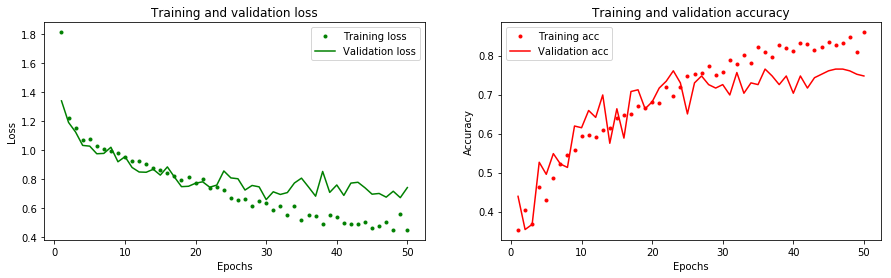

In [12]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
classifier.save('model4.h5')

In [14]:
from keras.models import load_model
model4 = load_model('Models/model4.h5')
model4.load_weights('Models/model4_weights.best.hdf5')


In [169]:
model4.evaluate_generator(generator=test_set,
steps=231)

[0.8664002138406595, 0.7620720037040845]

## Building a Model with 5 classes

### Building the CNN

In [33]:
from keras.layers.normalization import BatchNormalization
# Initialising the CNN
classifier = Sequential()

In [34]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [35]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [36]:
# Step 3 - Flattening
classifier.add(Flatten())

In [37]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

"\n* units= number of nodes in the hidden layer(full connection).\n\n* 128 is not too small, but it can be higher if using GPU.\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [38]:
# Final output layer
classifier.add(Dense(units=5, activation='softmax'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''


"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [39]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images


#### Image Preprocessing

In [40]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=5

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset3/train',
                                                 target_size=(64, 64),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset3/val',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 1568 images belonging to 5 classes.
Found 396 images belonging to 5 classes.


#### Checkpoint

In [41]:
# checkpoint
filepath="model5_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [42]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=1569 // batch_size,
                         epochs=25,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=396 // batch_size)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/25
313/313 [==============================] - 64s 206ms/step - loss: 2.1137 - acc: 0.3176 - val_loss: 1.5806 - val_acc: 0.4051

Epoch 00001: val_acc improved from -inf to 0.40506, saving model to model5_weights.best.hdf5
Epoch 2/25
313/313 [==============================] - 61s 195ms/step - loss: 1.7941 - acc: 0.3491 - val_loss: 1.2546 - val_acc: 0.4808

Epoch 00002: val_acc improved from 0.40506 to 0.48082, saving model to model5_weights.best.hdf5
Epoch 3/25
313/313 [==============================] - 63s 201ms/step - loss: 1.4887 - acc: 0.4230 - val_loss: 1.3145 - val_acc: 0.4476

Epoch 00003: val_acc did not improve from 0.48082
Epoch 4/25
313/313 [==============================] - 62s 198ms/step - loss: 1.3475 - acc: 0.4718 - val_loss: 1.0948 - val_acc: 0.5652

Epoch 00004: val_acc improved from 0.48082 to 0.56522, saving model to model5_weights.best.hdf5
Epoch 5/25
313/313 [==============================] - 60s 191ms/step - loss: 1.2806 - acc: 0.4807 - val_loss: 1.1694 - va

'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

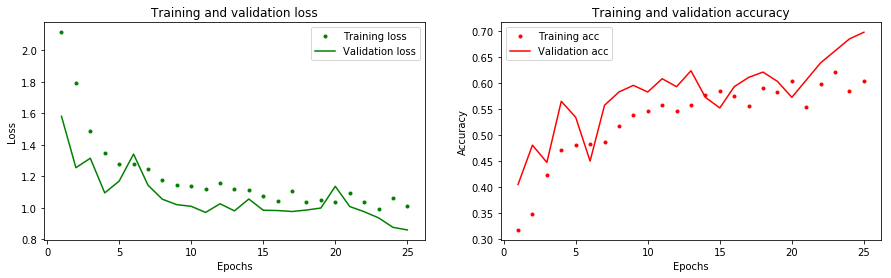

In [43]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
classifier.save('model5.h5')

In [46]:
from keras.models import load_model
model5 = load_model('Models/model5.h5')
model5.load_weights('Models/model5_weights.best.hdf5')

In [47]:
model5.evaluate_generator(generator=test_set,
                          steps=396)

[0.8474310113535244, 0.7091836863634537]

In [ ]:
predict_set = test_datagen.flow_from_directory('dataset3/val',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='categorical')

In [57]:
test_set[0][0][0].shape

(64, 64, 3)

In [81]:
test_set.reset()
pred=model5.predict_generator(test_set,
steps=396,
verbose=1)

396/396 [==============================] - 58s 148ms/step


In [82]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [83]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [84]:
labels

{0: 'Attack On Titan',
 1: 'Dragon Ball Z',
 2: 'My Hero Academia',
 3: 'Naruto',
 4: 'Pokemon'}

In [85]:
predictions[0]

'Dragon Ball Z'

In [86]:
pred

array([[0.00271614, 0.47638294, 0.17342052, 0.084116  , 0.26336446],
       [0.01003769, 0.21264528, 0.169895  , 0.53521   , 0.07221209],
       [0.06607334, 0.02212946, 0.8798834 , 0.02099288, 0.01092097],
       ...,
       [0.07019223, 0.1508917 , 0.15989438, 0.0928812 , 0.52614045],
       [0.01190116, 0.07935747, 0.09873048, 0.11131461, 0.6986963 ],
       [0.03850769, 0.18205586, 0.16085117, 0.53156924, 0.08701602]],
      dtype=float32)

In [87]:
filenames=test_set.filenames

In [88]:
len(filenames)

396

In [89]:
len(predictions)

1964

In [79]:
filenames

['Attack On Titan/10.cfcd193dd4a483dff9e0917c92a829ed.jpg',
 'Attack On Titan/11.66e5c5c05f544bf9ebb82bcd0e71f8630f981990v2_hq.jpg',
 'Attack On Titan/11.Ez4o4yf.jpg',
 'Attack On Titan/14.attack-on-titan-season-2.jpg',
 'Attack On Titan/14.attack-on-titan.jpg',
 'Attack On Titan/15.attack-on-titan.jpg',
 'Attack On Titan/15.featured-696x300.jpg',
 'Attack On Titan/17.Mb25C.jpg',
 'Attack On Titan/17.attack-on-titan-season-2-release-date-1.jpg',
 'Attack On Titan/18.Attack_on_Titan_Levi_Ackerman_Short_Wavy_Black_Anime_Cosplay_Wig_3_1800x.png',
 'Attack On Titan/21.attack-on-titan-season-2.jpg',
 'Attack On Titan/21.captain-levi-does-not-like-kenny-the-ripper-in-attack-on-titan-season-3.jpeg',
 'Attack On Titan/23.AToT-HERO2.jpg',
 'Attack On Titan/29.11968_original.jpg',
 'Attack On Titan/3.220px-Attack_on_Titan_Season_3_vol_1.jpg',
 'Attack On Titan/31.6zdzhnG.jpg',
 'Attack On Titan/32.discussionImage.jpg',
 'Attack On Titan/33.Attack-on-Titan-Season-3-Wallpaper-500x500.jpg',
 'Attac

In [71]:
import pandas as pd
filenames=test_set.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

ValueError: arrays must all be same length